### https://scikit-learn.org/stable/modules/linear_model.html

# 1.1.11. Logistic regression

## 🔢 How Logistic Regression Works

1. **Linear Combination of Inputs:**

$$
z = w_0 + w_1x_1 + w_2x_2 + \cdots + w_nx_n
$$
2. **Apply the Sigmoid (Logistic) Function:**

$$
\sigma(z) = \frac{1}{1 + e^{-z}}
$$
- This function squashes the output to a range between **0 and 1**.
- The result can be interpreted as the **probability** that the input belongs to **class 1**.

3. **Decision Rule:**

$$
[
\text{If } \sigma(z) \geq 0.5 \Rightarrow \text{Class 1 (positive)}
]
$$
$$
[
\text{If } \sigma(z) < 0.5 \Rightarrow \text{Class 0 (negative)}
]
$$


## Logistic Regression as a special case of the Generalized Linear Models (GLM)

Logistic regression is a special case of Generalized Linear Models with a Binomial / Bernoulli conditional distribution and a Logit link. <br>
The numerical output of the logistic regression, which is the predicted probability, can be used as a classifier by applying a threshold (by default 0.5) to it. <br> This is how it is implemented in scikit-learn, so it expects a categorical target, making the Logistic Regression a classifier.

## 🔢 Logistic Regression: Model Formula and Internals

### 📘 Model Formula

Logistic Regression models the probability of class 1 using the **sigmoid function**:

$$
P(y = 1 \mid \mathbf{x}) = \sigma(z) = \frac{1}{1 + e^{-z}}
$$

Where:

$$
z = \mathbf{w}^\top \mathbf{x} + b = w_1 x_1 + w_2 x_2 + \dots + w_n x_n + b
$$

- $ \mathbf{w} $: Weight vector (coefficients)
- $ b $: Intercept (bias)
- $ \sigma(z) $: Sigmoid function output (between 0 and 1)

---

### 🧮 Model Internals in `scikit-learn`

You can extract:

- **Coefficients** → `model.coef_`
- **Intercept** → `model.intercept_`
- **Linear score**


## Model Output for Coef_, Intercept, Prob Calculation and Predicted Result

In [10]:
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_classification
import numpy as np

# ✅ Fixed: specify n_redundant=0, n_repeated=0
X, y = make_classification(
    n_samples=5,
    n_features=3,
    n_informative=2,
    n_redundant=0,
    n_repeated=0,
    random_state=42
)

# Fit logistic regression model (no regularization)
model = LogisticRegression(penalty=None, solver='lbfgs')
model.fit(X, y)

# Extract model parameters
coef = model.coef_         # Coefficients (w)
intercept = model.intercept_  # Intercept (b)

# Predict on first sample
x0 = X[0]
z = coef @ x0.reshape(-1, 1) + intercept  # Linear score
prob = 1 / (1 + np.exp(-z))               # Sigmoid output

# Output results
print("Feature vector x[0]:", x0)
print("Coefficients (w):", coef)
print("Intercept (b):", intercept)
print("Linear combination z = w·x + b:", z.flatten()[0])
print("Sigmoid probability σ(z):", prob.flatten()[0])
print("Predicted class:", model.predict([x0])[0])


Feature vector x[0]: [-1.26195146 -1.15099358 -1.32136078]
Coefficients (w): [[ 2.42517398 -1.62781321  9.63932216]]
Intercept (b): [-0.28192033]
Linear combination z = w·x + b: -14.205791911281937
Sigmoid probability σ(z): 6.768659509477456e-07
Predicted class: 0


## Example of Log Regression; Penalty l1 vs Penalty l2

In [2]:
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_classification
import numpy as np

# Create toy dataset
X, y = make_classification(
    n_samples=5,
    n_features=3,
    n_informative=2,
    n_redundant=0,
    n_repeated=0,
    random_state=42
)

x0 = X[0].reshape(1, -1)

# Standard Logistic Regression (no regularization)
model_none = LogisticRegression(penalty=None, solver='lbfgs')
model_none.fit(X, y)

# L2-Regularized Logistic Regression
model_l2 = LogisticRegression(penalty='l2', solver='lbfgs', C=1.0)
model_l2.fit(X, y)

# L1-Regularized Logistic Regression (requires liblinear solver)
model_l1 = LogisticRegression(penalty='l1', solver='liblinear', C=1.0)
model_l1.fit(X, y)

# Function to print model info
def show_model_info(name, model):
    coef = model.coef_
    intercept = model.intercept_
    z = coef @ x0.T + intercept
    prob = 1 / (1 + np.exp(-z))
    pred = model.predict(x0)[0]

    print(f"=== {name} ===")
    print("Coefficients (w):", coef)
    print("Intercept (b):", intercept)
    print("Linear z = w·x + b:", z.flatten()[0])
    print("Sigmoid σ(z):", prob.flatten()[0])
    print("Predicted class:", pred)
    print()

# Show for each model
show_model_info("Standard (No Penalty)", model_none)
show_model_info("L2-Regularized", model_l2)
show_model_info("L1-Regularized", model_l1)


=== Standard (No Penalty) ===
Coefficients (w): [[ 2.42517398 -1.62781321  9.63932216]]
Intercept (b): [-0.28192033]
Linear z = w·x + b: -14.205791911281937
Sigmoid σ(z): 6.768659509477456e-07
Predicted class: 0

=== L2-Regularized ===
Coefficients (w): [[ 0.37452809 -0.10266739  1.06233578]]
Intercept (b): [-0.02435398]
Linear z = w·x + b: -1.7825495806274776
Sigmoid σ(z): 0.14398859795482813
Predicted class: 0

=== L1-Regularized ===
Coefficients (w): [[0.        0.        1.2891833]]
Intercept (b): [0.]
Linear z = w·x + b: -1.7034762514274244
Sigmoid σ(z): 0.15401179182236216
Predicted class: 0



C:\Users\idrealme\Anaconda3\envs\stock_analysis\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128290 (\N{INPUT SYMBOL FOR NUMBERS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


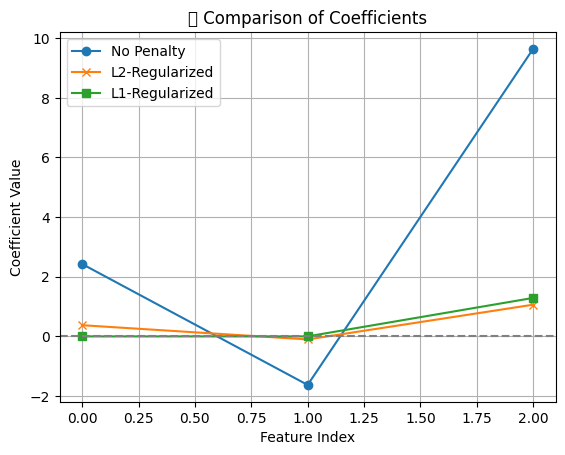

In [3]:
import matplotlib.pyplot as plt

plt.plot(model_none.coef_[0], marker='o', label='No Penalty')
plt.plot(model_l2.coef_[0], marker='x', label='L2-Regularized')
plt.plot(model_l1.coef_[0], marker='s', label='L1-Regularized')

plt.axhline(0, color='gray', linestyle='--')
plt.title("🔢 Comparison of Coefficients")
plt.xlabel("Feature Index")
plt.ylabel("Coefficient Value")
plt.legend()
plt.grid(True)
plt.show()


In [4]:
from sklearn.metrics import accuracy_score, log_loss

# Evaluate on training data (since toy dataset is small)
models = {
    "No Penalty": model_none,
    "L2-Regularized": model_l2,
    "L1-Regularized": model_l1
}

print("🔍 Model Evaluation (on training data):")
print("----------------------------------------")

for name, model in models.items():
    y_pred = model.predict(X)
    y_prob = model.predict_proba(X)

    acc = accuracy_score(y, y_pred)
    loss = log_loss(y, y_prob)

    print(f"{name}")
    print(f"  ✅ Accuracy: {acc:.3f}")
    print(f"  ❌ Log Loss: {loss:.3f}")
    print()


🔍 Model Evaluation (on training data):
----------------------------------------
No Penalty
  ✅ Accuracy: 1.000
  ❌ Log Loss: 0.000

L2-Regularized
  ✅ Accuracy: 1.000
  ❌ Log Loss: 0.239

L1-Regularized
  ✅ Accuracy: 1.000
  ❌ Log Loss: 0.236



# Example with more dataset


# 🧪 Logistic Regression: Extended Evaluation Workflow

This notebook compares 3 logistic regression models using:

- A larger dataset (1000 samples, 10 features)
- Train/test split (80%/20%)
- Regularization types:
  - **None**
  - **L2** (Ridge)
  - **L1** (Lasso)
  
### ✅ Evaluation Metrics:
- Accuracy
- Log Loss
- Precision / Recall / F1
- ROC-AUC Curve

Let's get started!


## 🟩 2. Code Cell – Create Dataset & Split

In [5]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

# Larger dataset
X, y = make_classification(
    n_samples=1000,
    n_features=10,
    n_informative=5,
    n_redundant=2,
    random_state=42
)

# Split into train/test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


## 🟨 3. Code Cell – Fit Models

In [7]:
from sklearn.linear_model import LogisticRegression

# Create 3 models
model_none = LogisticRegression(penalty=None, solver='lbfgs', max_iter=1000)
model_l2 = LogisticRegression(penalty='l2', solver='lbfgs', C=1.0, max_iter=1000)
model_l1 = LogisticRegression(penalty='l1', solver='liblinear', C=1.0, max_iter=1000)

# Fit
model_none.fit(X_train, y_train)
model_l2.fit(X_train, y_train)
model_l1.fit(X_train, y_train)


LogisticRegression(max_iter=1000, penalty='l1', solver='liblinear')

## 🟥 4. Code Cell – Evaluate All Models

In [8]:
from sklearn.metrics import accuracy_score, log_loss, classification_report, roc_auc_score

models = {
    "No Penalty": model_none,
    "L2-Regularized": model_l2,
    "L1-Regularized": model_l1
}

for name, model in models.items():
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)

    acc = accuracy_score(y_test, y_pred)
    loss = log_loss(y_test, y_prob)
    auc = roc_auc_score(y_test, y_prob[:, 1])

    print(f"📌 {name}")
    print(f"  ✅ Accuracy:      {acc:.4f}")
    print(f"  ❌ Log Loss:      {loss:.4f}")
    print(f"  📈 ROC AUC Score: {auc:.4f}")
    print()
    print("🔍 Classification Report:")
    print(classification_report(y_test, y_pred, digits=3))
    print("-" * 50)


📌 No Penalty
  ✅ Accuracy:      0.8350
  ❌ Log Loss:      0.3824
  📈 ROC AUC Score: 0.9119

🔍 Classification Report:
              precision    recall  f1-score   support

           0      0.856     0.848     0.852       112
           1      0.809     0.818     0.814        88

    accuracy                          0.835       200
   macro avg      0.832     0.833     0.833       200
weighted avg      0.835     0.835     0.835       200

--------------------------------------------------
📌 L2-Regularized
  ✅ Accuracy:      0.8350
  ❌ Log Loss:      0.3829
  📈 ROC AUC Score: 0.9119

🔍 Classification Report:
              precision    recall  f1-score   support

           0      0.856     0.848     0.852       112
           1      0.809     0.818     0.814        88

    accuracy                          0.835       200
   macro avg      0.832     0.833     0.833       200
weighted avg      0.835     0.835     0.835       200

--------------------------------------------------
📌 L1-R

## 5. (Optional) ROC Curve Visualization

<Figure size 800x600 with 0 Axes>

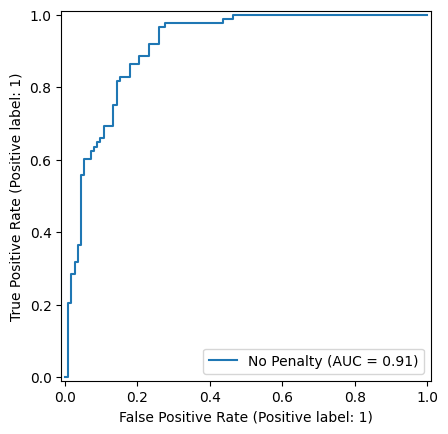

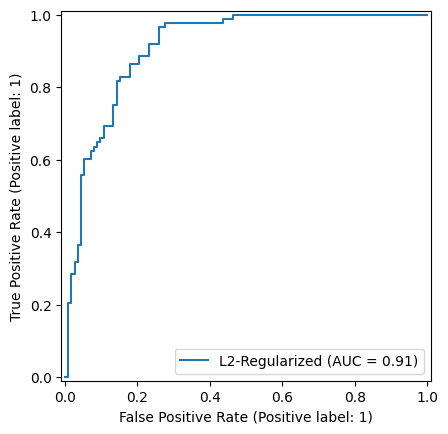

C:\Users\idrealme\Anaconda3\envs\stock_analysis\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


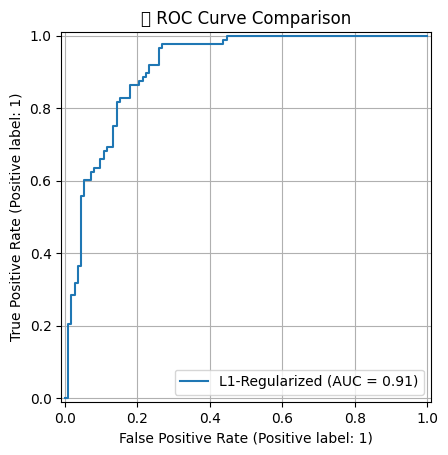

In [9]:
import matplotlib.pyplot as plt
from sklearn.metrics import RocCurveDisplay

plt.figure(figsize=(8, 6))

for name, model in models.items():
    y_prob = model.predict_proba(X_test)[:, 1]
    RocCurveDisplay.from_predictions(y_test, y_prob, name=name)

plt.title("📈 ROC Curve Comparison")
plt.grid(True)
plt.show()


## Visualize to same graph

C:\Users\idrealme\Anaconda3\envs\stock_analysis\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


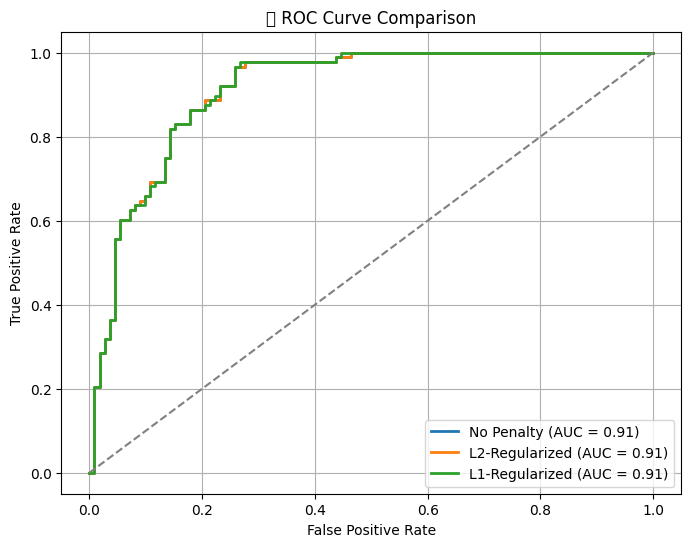

In [10]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

plt.figure(figsize=(8, 6))

for name, model in models.items():
    y_scores = model.predict_proba(X_test)[:, 1]  # probability of class 1
    fpr, tpr, _ = roc_curve(y_test, y_scores)
    roc_auc = auc(fpr, tpr)
    
    plt.plot(fpr, tpr, lw=2, label=f"{name} (AUC = {roc_auc:.2f})")

# Plot random guess line
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')

plt.title("📈 ROC Curve Comparison")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="lower right")
plt.grid(True)
plt.show()


### Direct and Manual AUC options

In [11]:
from sklearn.metrics import roc_auc_score, roc_curve, auc

# Get predicted probabilities for class 1
y_prob = model_l2.predict_proba(X_test)[:, 1]

# Method 1: Direct AUC using roc_auc_score
auc_direct = roc_auc_score(y_test, y_prob)

# Method 2: Manual AUC using roc_curve and auc()
fpr, tpr, _ = roc_curve(y_test, y_prob)
auc_manual = auc(fpr, tpr)

# Print comparison
print("🔍 ROC AUC Comparison:")
print(f"✅ roc_auc_score: {auc_direct:.6f}")
print(f"✅ auc(fpr, tpr): {auc_manual:.6f}")
print(f"🟰 Equal: {np.isclose(auc_direct, auc_manual)}")


🔍 ROC AUC Comparison:
✅ roc_auc_score: 0.911932
✅ auc(fpr, tpr): 0.911932
🟰 Equal: True
